**Hypothesis** : Transition rate depends position of an ion relative to the 1762nm laser.
------------
Ion positions can vary from file to file which interferes with our analysis. Thus, we picked only those files in which the positions of ions were identically same. 

In [21]:
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats
import scipy.stats
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import glob
import time
import pandas as pd
import math
#import File_functions
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

import Ion_functions as func
from Ion_functions import Ion
import choose_file 

Mon Jun 28 22:23:16 2021


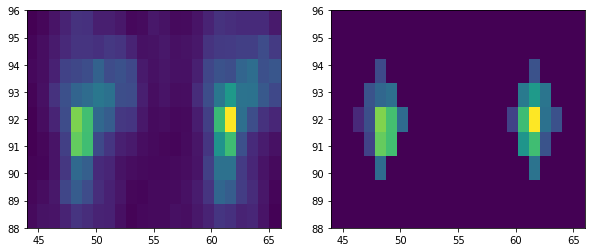

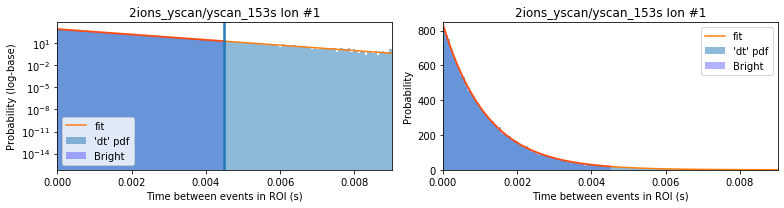

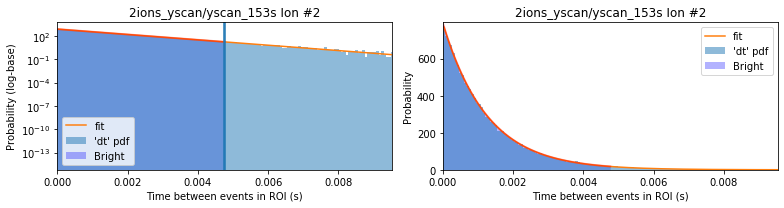

In [22]:
choose_file.Two_ions_yscan_153s() #file selection, plots ROI's to verify number and location of Ions. 
ion_1 = choose_file.ion_1
ion_2 = choose_file.ion_2

Ion_1 = choose_file.Ion_1
Ion_2 = choose_file.Ion_2


filename = choose_file.filename
old_data_table = choose_file.old_data_table
data_table = choose_file.data_table
time = data_table['time'].max() - data_table['time'].min()


sigma = 2
uncertainty = True
single_photon = False
ion_1.setup(sigma, uncertainty, single_photon)
ion_2.setup(sigma, uncertainty, single_photon)

rates_yscan_153s = [len(ion_1.transpts)/time, len(ion_2.transpts)/time]

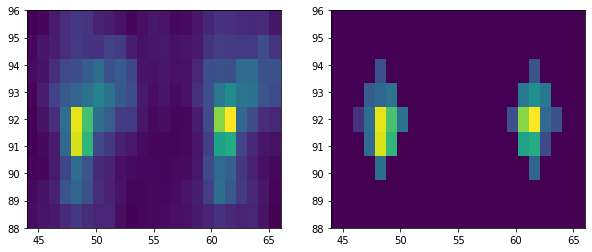

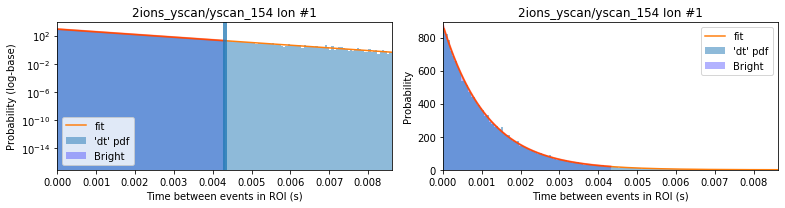

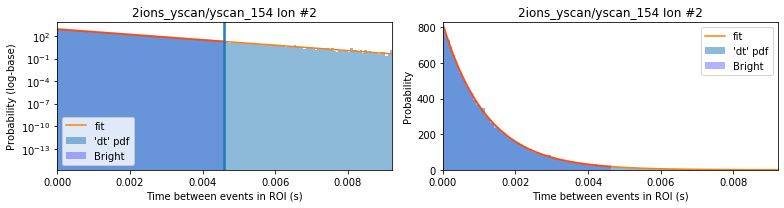

In [23]:
choose_file.Two_ions_yscan_154() #file selection, plots ROI's to verify number and location of Ions. 
ion_1 = choose_file.ion_1
ion_2 = choose_file.ion_2

Ion_1 = choose_file.Ion_1
Ion_2 = choose_file.Ion_2


filename = choose_file.filename
old_data_table = choose_file.old_data_table
data_table = choose_file.data_table
time = data_table['time'].max() - data_table['time'].min()


sigma = 2
uncertainty =  True
single_photon = False
ion_1.setup(sigma, uncertainty, single_photon)
ion_2.setup(sigma, uncertainty, single_photon)

rates_yscan_154 = [len(ion_1.transpts)/time, len(ion_2.transpts)/time]

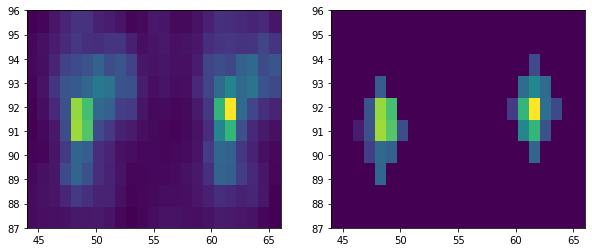

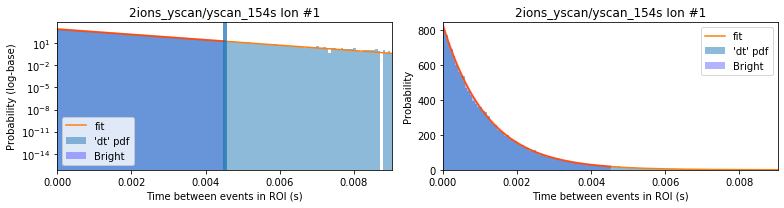

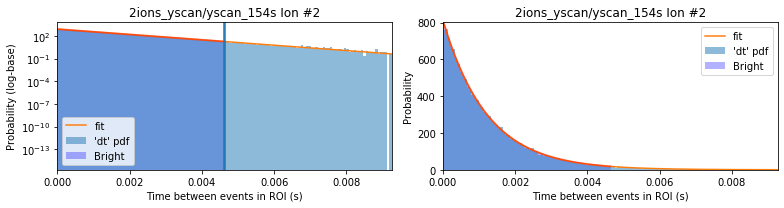

In [24]:
choose_file.Two_ions_yscan_154s() #file selection, plots ROI's to verify number and location of Ions. 
ion_1 = choose_file.ion_1
ion_2 = choose_file.ion_2

Ion_1 = choose_file.Ion_1
Ion_2 = choose_file.Ion_2


filename = choose_file.filename
old_data_table = choose_file.old_data_table
data_table = choose_file.data_table
time = data_table['time'].max() - data_table['time'].min()


sigma = 2
uncertainty =  True
single_photon = False
ion_1.setup(sigma, uncertainty, single_photon)
ion_2.setup(sigma, uncertainty, single_photon)

rates_yscan_154s = [len(ion_1.transpts)/time, len(ion_2.transpts)/time]

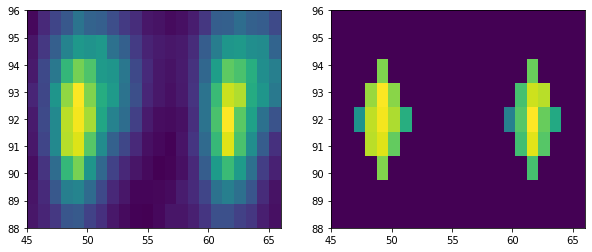

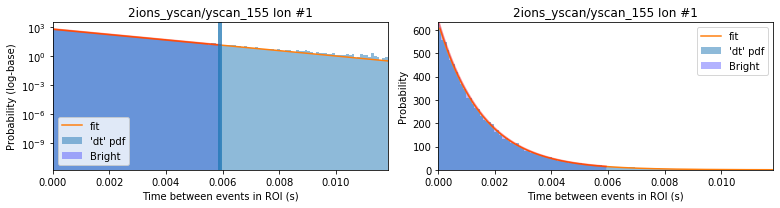

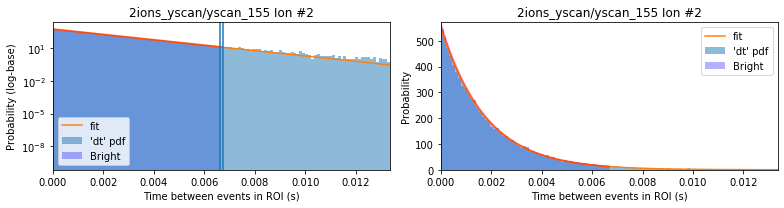

In [25]:
import importlib
importlib.reload(choose_file)
choose_file.Two_ions_yscan_155() #file selection, plots ROI's to verify number and location of Ions. 
ion_1 = choose_file.ion_1
ion_2 = choose_file.ion_2

Ion_1 = choose_file.Ion_1
Ion_2 = choose_file.Ion_2


filename = choose_file.filename
old_data_table = choose_file.old_data_table
data_table = choose_file.data_table
time = data_table['time'].max() - data_table['time'].min()


sigma = 2
uncertainty =  True
single_photon = False
ion_1.setup(sigma, uncertainty, single_photon)
ion_2.setup(sigma, uncertainty, single_photon)

rates_yscan_155 = [len(ion_1.transpts)/time, len(ion_2.transpts)/time]


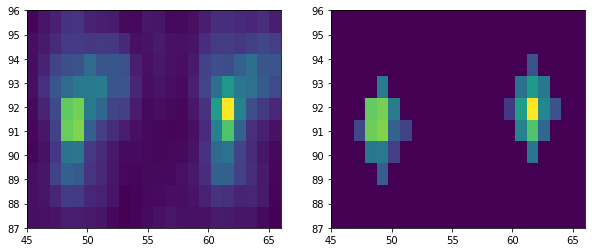

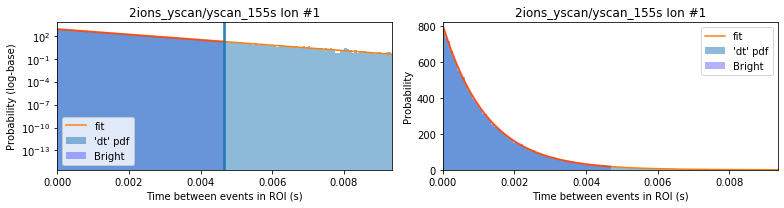

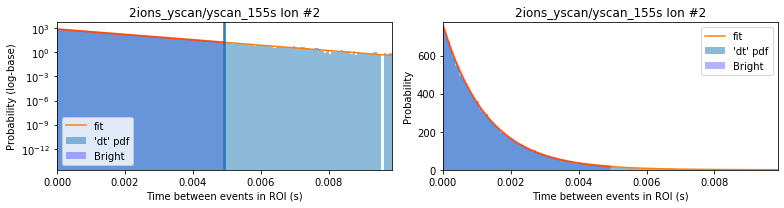

In [26]:
choose_file.Two_ions_yscan_155s() #file selection, plots ROI's to verify number and location of Ions. 
ion_1 = choose_file.ion_1
ion_2 = choose_file.ion_2

Ion_1 = choose_file.Ion_1
Ion_2 = choose_file.Ion_2


filename = choose_file.filename
old_data_table = choose_file.old_data_table
data_table = choose_file.data_table
time = data_table['time'].max() - data_table['time'].min()


sigma = 2
uncertainty =  True
single_photon = False
ion_1.setup(sigma, uncertainty, single_photon)
ion_2.setup(sigma, uncertainty, single_photon)

rates_yscan_155s = [len(ion_1.transpts)/time, len(ion_2.transpts)/time]

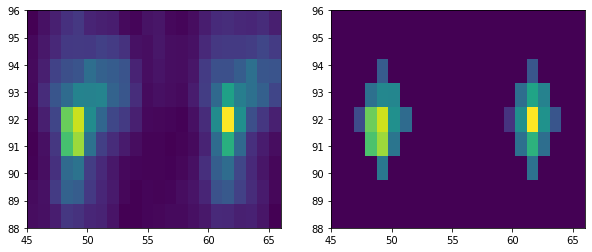

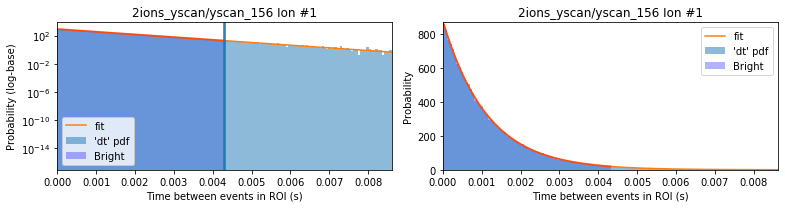

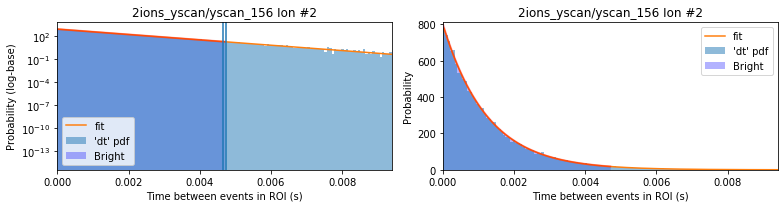

In [27]:
choose_file.Two_ions_yscan_156() #file selection, plots ROI's to verify number and location of Ions. 
ion_1 = choose_file.ion_1
ion_2 = choose_file.ion_2

Ion_1 = choose_file.Ion_1
Ion_2 = choose_file.Ion_2


filename = choose_file.filename
old_data_table = choose_file.old_data_table
data_table = choose_file.data_table
time = data_table['time'].max() - data_table['time'].min()


sigma = 2
uncertainty =  True
single_photon = False
ion_1.setup(sigma, uncertainty, single_photon)
ion_2.setup(sigma, uncertainty, single_photon)

rates_yscan_156 = [len(ion_1.transpts)/time, len(ion_2.transpts)/time]

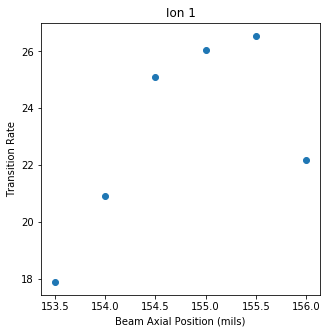

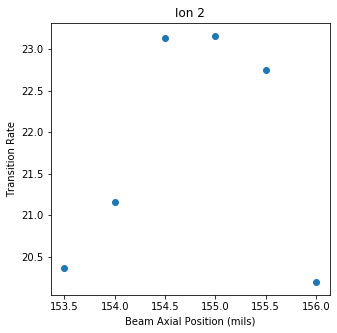

In [28]:
#Graphs as a function of  position of beam 

beam_apositions=np.array([153.5,154,154.5,155,155.5,156])
rate=[]
for i in range (2):
    
    rates_yscan=np.array([rates_yscan_153s[i],rates_yscan_154[i],rates_yscan_154s[i],rates_yscan_155[i],rates_yscan_155s[i],rates_yscan_156[i]])
    rate.append(rates_yscan)   
    
    fig, ax = plt.subplots(1, figsize = (5, 5))
    ax.scatter(beam_apositions, rates_yscan)
    ax.set_xlabel("Beam Axial Position (mils)")
    ax.set_ylabel("Transition Rate")
    ax.set_title(f'Ion {i+1}')

   


2.3846211386225686


Text(0, 0.5, 'transition rates')

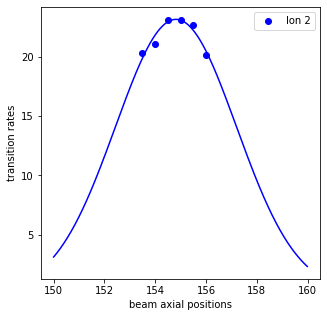

In [29]:
sigma=[]

fig, ax = plt.subplots(1, figsize = (5,5))
#ax.scatter(beam_apositions, rate[0], label = 'Ion 1', color = 'm')
ax.scatter(beam_apositions, rate[1], label = 'Ion 2', color = 'b')

"""popt, pcov = curve_fit(func.Gaussian, beam_apositions, rate[0], p0 = [155, 0.5, 26, 0], bounds = ([-np.inf, -np.inf, -np.inf, -.1], [np.inf, np.inf, np.inf, .1]))
x = np.arange(150, 160, .01)
y = func.Gaussian(x, *popt)
plt.plot(x, y, 'm')
print(popt[1])                                            #returns sigma used to calculate fwhm                                                      
sigma.append(popt[1])"""

popt, pcov = curve_fit(func.Gaussian, beam_apositions, rate[1], p0 = [155, 0.5, 23, 0], bounds = ([-np.inf, -np.inf, -np.inf, -.1], [np.inf, np.inf, np.inf, .1]))
x = np.arange(150, 160, .01)
y = func.Gaussian(x, *popt)
plt.plot(x, y, 'b')
print(popt[1])
sigma.append(popt[1])


plt.legend()
plt.xlabel("beam axial positions")
plt.ylabel("transition rates")

In [30]:
#FWHM calculation using sigma 

width=[]
def sigma2fwhm(sigma):
    width.append(sigma * np.sqrt(8 * np.log(2)))
for i in range (1):
    sigma2fwhm(sigma[i])
    print (width[i],"mils"),

5.6153536570329505 mils


### Neglecting file y_scan 153.5 (large gaps in x vs t plot) would give slightly different gaussians:
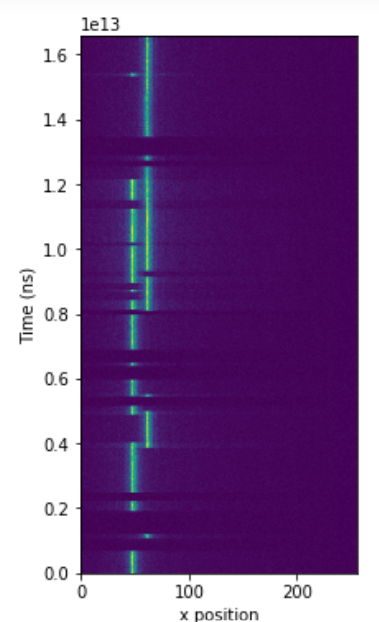

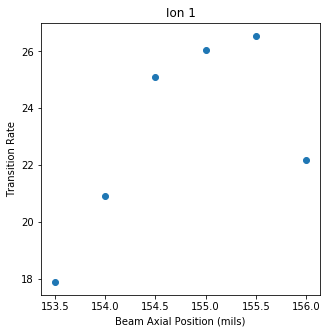

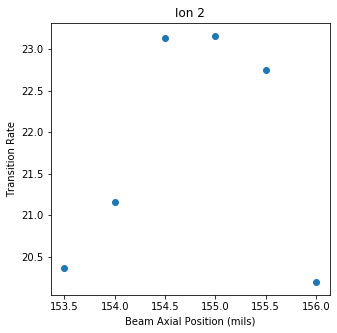

In [31]:
beam_apositions=np.array([153.5,154,154.5,155,155.5,156])
rate=[]
for i in range (2):
    
    rates_yscan=np.array([rates_yscan_153s[i],rates_yscan_154[i],rates_yscan_154s[i],rates_yscan_155[i],rates_yscan_155s[i],rates_yscan_156[i]])
    rate.append(rates_yscan)   
    
    fig, ax = plt.subplots(1, figsize = (5, 5))
    ax.scatter(beam_apositions, rates_yscan)
    ax.set_xlabel("Beam Axial Position (mils)")
    ax.set_ylabel("Transition Rate")
    ax.set_title(f'Ion {i+1}')
    ax.set_xticks([153.5,154,154.5,155,155.5,156])



2.3846211386225686 sigma for ion 2 


Text(0, 0.5, 'transition rates')

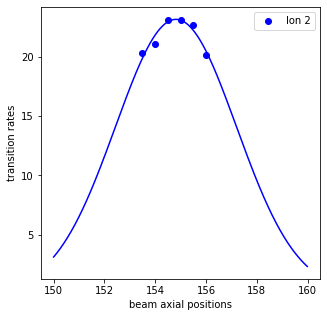

In [32]:
sigma=[]

fig, ax = plt.subplots(1, figsize = (5,5))
#ax.scatter(beam_apositions, rate[0], label = 'Ion 1', color = 'm')
ax.scatter(beam_apositions, rate[1], label = 'Ion 2', color = 'b')

"""popt, pcov = curve_fit(func.Gaussian, beam_apositions, rate[0], p0 = [155, 0.5, 26, 0], bounds = ([-np.inf, -np.inf, -np.inf, -.1], [np.inf, np.inf, np.inf, .1]))
x = np.arange(150, 160, .01)
y = func.Gaussian(x, *popt)
plt.plot(x, y, 'm')
print(popt[1],"sigma for ion 1 ")                                            #returns sigma used to calculate fwhm                                                      
sigma.append(popt[1])
"""
popt, pcov = curve_fit(func.Gaussian, beam_apositions, rate[1], p0 = [155, 0.5, 23, 0], bounds = ([-np.inf, -np.inf, -np.inf, -.1], [np.inf, np.inf, np.inf, .1]))
x = np.arange(150, 160, .01)
y = func.Gaussian(x, *popt)
plt.plot(x, y, 'b')
print(popt[1],"sigma for ion 2 ")
sigma.append(popt[1])


plt.legend()
plt.xlabel("beam axial positions")
plt.ylabel("transition rates")

In [33]:
#FWHM calculation using sigma 

width=[]
def sigma2fwhm(sigma):
    width.append(sigma * np.sqrt(8 * np.log(2)))
for i in range (2):
    sigma2fwhm(sigma[i])
    print (width[i],"mils"),

5.6153536570329505 mils


IndexError: list index out of range

# 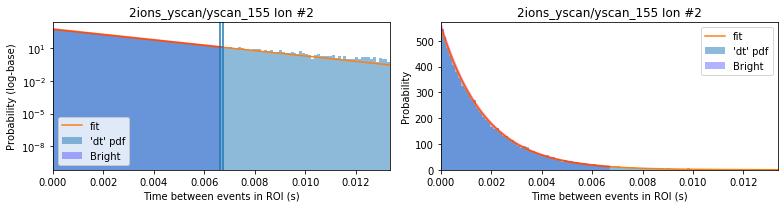


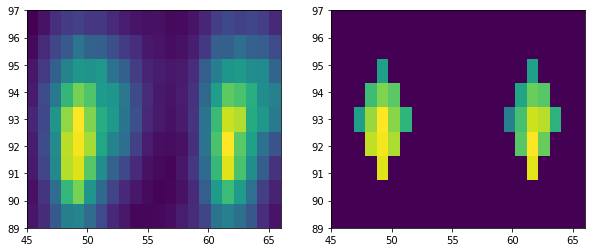

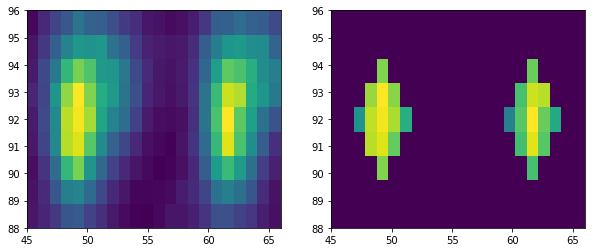

y1=y2=92

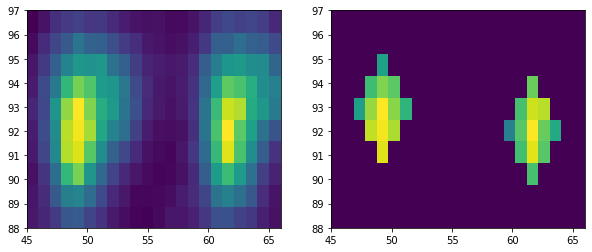

In [34]:
print (time)

165.94402084095998


In [35]:
print (time)

165.94402084095998


In [36]:
type(time)

float

167.94402084095998

165.94402084095998

2
